- Seaborn : Matplotlib을 기반으로 다양한 색상 테마와 통계용 차트 등의 기능을 추가한 시각화 패키지

http://seaborn.pydata.org/

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

### 1차원 분포 플롯
- 1차원 데이터는 실수 값이면 히스토그램과 같은 실수 분포 플롯으로 나타내고 카테고리 값이면 카운트 플롯으로 나타낸다.

In [3]:
iris = sns.load_dataset('iris') 
titanic = sns.load_dataset('titanic')
tips = sns.load_dataset('tips')
flights = sns.load_dataset('flights')

#### 1차원 실수 분포 플롯
- 자료의 분포를 묘사하기 위한 것
- Matplotlib의 단순한 히스토그램과 달리 kernel density 및 rug 표시 기능 및 다차원 복합 분포 기능 등을 제공한다.
- rugplot, kdeplt, distplot이 있다.

- rugplot : 데이터 위치를 x축 위에 작은 선분(rug)으로 나타내어 실제 데이터들의 위치를 보여준다.

http://seaborn.pydata.org/generated/seaborn.rugplot.html

In [5]:
plt.rcParams['font.family'] = 'Malgun Gothic'

C:\Users\82109\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


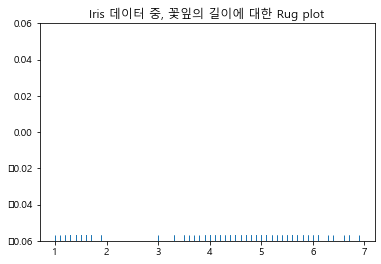

In [6]:
x = iris.petal_length.values

sns.rugplot(x)
plt.title('Iris 데이터 중, 꽃잎의 길이에 대한 Rug plot')
plt.show()

- 커널 밀도(kernel density)는 커널이라는 함수를 겹치는 방법으로 히스토그램보다 부드러운 형태의 분포 곡선을 보여주는 방법

http://seaborn.pydata.org/generated/seaborn.kdeplot.html

http://scikit-learn.org/stable/modules/density.html

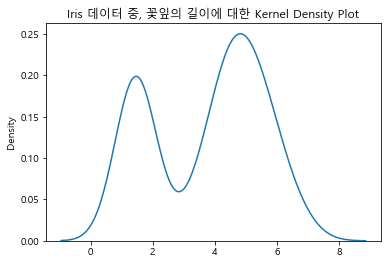

In [7]:
sns.kdeplot(x)
plt.title('Iris 데이터 중, 꽃잎의 길이에 대한 Kernel Density Plot')
plt.show()

C:\Users\82109\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\82109\anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


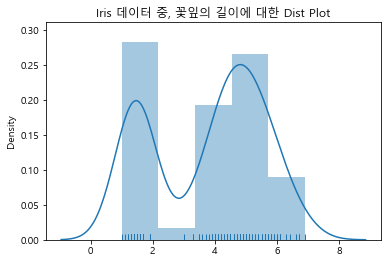

In [8]:
sns.distplot(x, kde=True, rug=True)
plt.title('Iris 데이터 중, 꽃잎의 길이에 대한 Dist Plot')
plt.show()

### 카운트 플롯
- countplot 명령은 데이터프레임에서만 사용할 수 있다.
- countplot(x='column_name', data=dataframe)
- http://seaborn.pydata.org/generated/seaborn.countplot.html

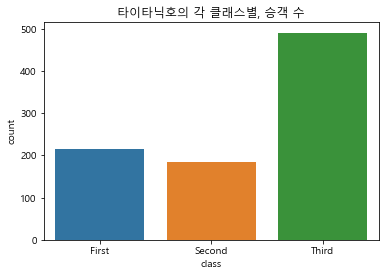

In [9]:
sns.countplot(x='class', data=titanic)
plt.title('타이타닉호의 각 클래스별, 승객 수')
plt.show()

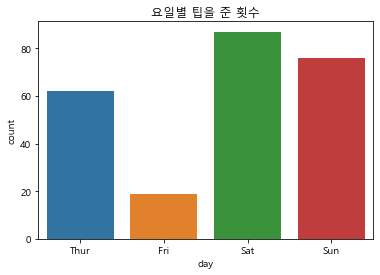

In [10]:
sns.countplot(x = 'day', data=tips)
plt.title('요일별 팁을 준 횟수')
plt.show()

## 다차원 데이터
- 분석하고자 하는 데이터가 모두 실수 값인 경우
- 분석하고자 하는 데이터가 모두 카테고리 값인 경우
- 분석하고자 하는 데이터가 모두 실수 값과 카테고리 값이 섞여 있는 경우

### 2차원 실수형 데이터
- 만약 데이터가 2차원이고 모두 연속적인 실수값이라면 scatter plot을 사용하면 된다. 
- jointplot 명령은 scatter plot뿐 아니라 차트의 가장자리에 각 변수의 히스토그램도 그린다.
- jointplot(x="x_name", y="y_name", data=dataframe, kind='scatter')

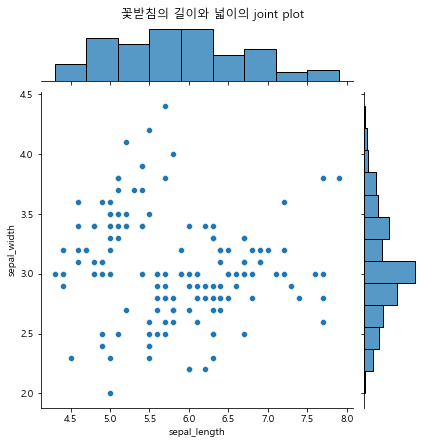

In [12]:
sns.jointplot(x='sepal_length', y='sepal_width', data=iris)
plt.suptitle('꽃받침의 길이와 넓이의 joint plot', y=1.02)
plt.show()

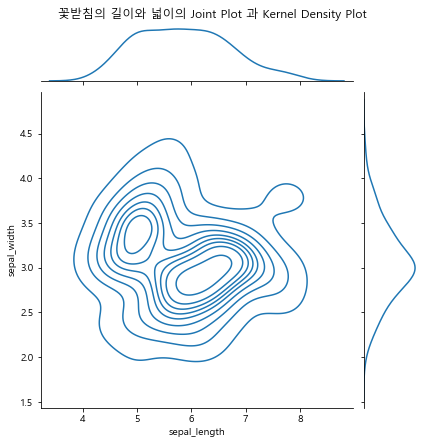

In [13]:
sns.jointplot(x="sepal_length", y="sepal_width", data=iris, kind="kde")
plt.suptitle("꽃받침의 길이와 넓이의 Joint Plot 과 Kernel Density Plot", y=1.02)
plt.show()

### 다차원 실수형 데이터
- 3차원 이상의 데이터일 경우 pairplot 명령을 사용
- pairplot은 데이터프레임을 인수로 받아 그리드(grid) 형태로 각 데이터 열의 조합에 대해 스캐터 플롯을 그린다. 같은 데이터가 만나는 대각선 영역에는 해당 데이터의 히스토그램을 그린다.

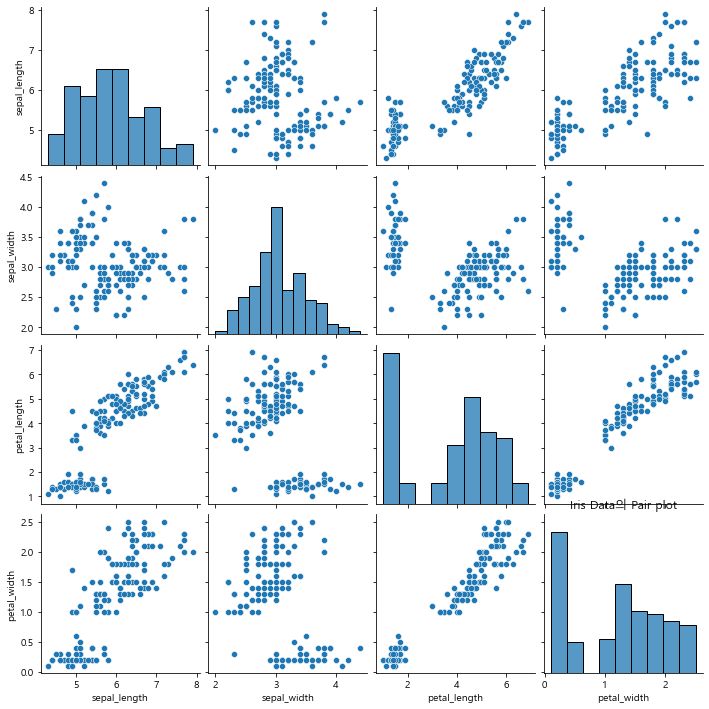

In [16]:
sns.pairplot(iris)
plt.title('Iris Data의 Pair plot')
plt.show()

- 카테고리형 데이터가 섞여 있는 경우

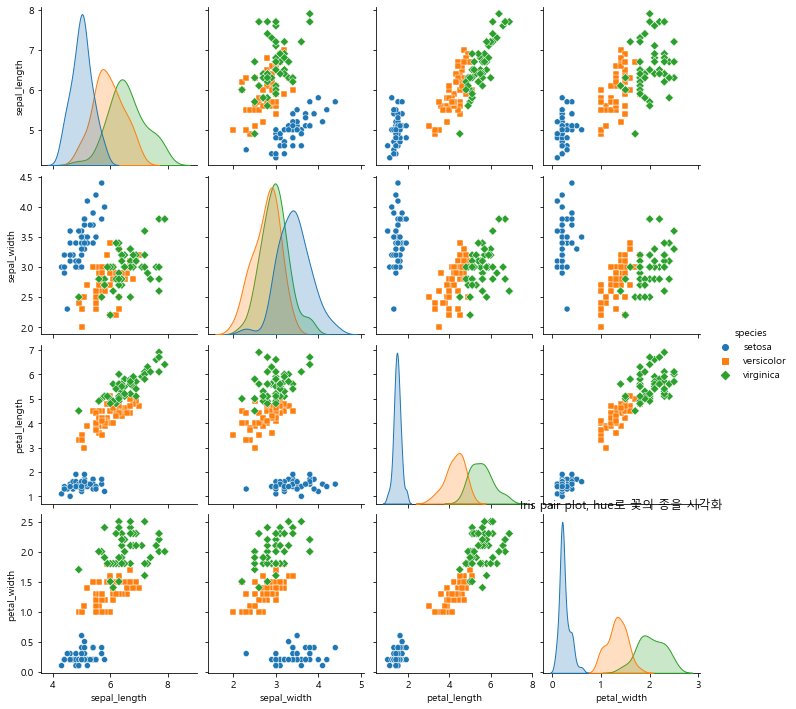

In [17]:
sns.pairplot(iris, hue='species', markers=['o','s','D'])
plt.title('Iris pair plot, hue로 꽃의 종을 시각화')
plt.show()

### 2차원 카테고리 데이터
- 만약 데이터가 2차원이고 모든 값이 카테고리 값이면 heatmap 명령을 사용한다.
- http://seaborn.pydata.org/generated/seaborn.heatmap.html

In [18]:
titanic_size = titanic.pivot_table(
    index='class', columns='sex', aggfunc='size')
titanic_size

sex,female,male
class,,
First,94,122
Second,76,108
Third,144,347


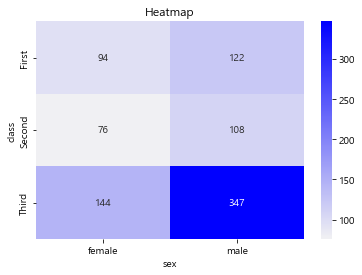

In [20]:
sns.heatmap(titanic_size, cmap=sns.light_palette(
    'blue', as_cmap=True), annot=True, fmt='d')
plt.title('Heatmap')
plt.show()

### 2차원 복합 데이터
- 데이터가 2차원이고 실수 값, 카테고리 값이 섞여 있을 때

#### barplot : 카테고리 값에 따른 실수 값의 평균과 편차를 표시하는 기본적인 바 차트 생성

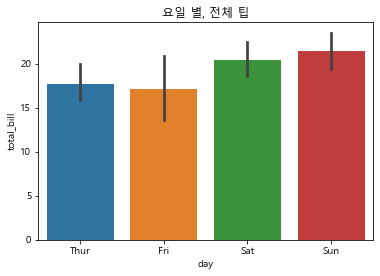

In [21]:
sns.barplot(x='day', y='total_bill', data=tips)
plt.title('요일 별, 전체 팁')
plt.show()

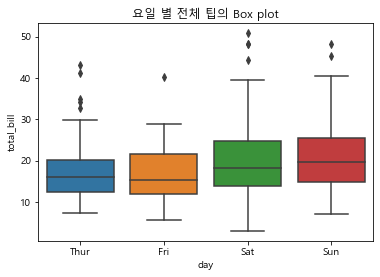

In [22]:
sns.boxplot(x='day', y='total_bill', data=tips)
plt.title('요일 별 전체 팁의 Box plot')
plt.show()

- violinplot : 카테고리 값에 따른 각 분포의 실제 데이터나 전체 형상을 보여준다는 장점

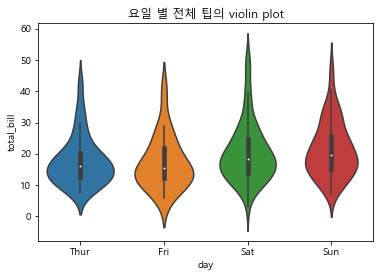

In [23]:
sns.violinplot(x='day', y='total_bill', data=tips)
plt.title('요일 별 전체 팁의 violin plot')
plt.show()

- stripplot : jitter=True를 설정하면 가로축상의 위치를 무작위로 바꾸어서 데이터의 수가 많은 경우에 겹치지 않게 해 준다.

In [25]:
import numpy as np

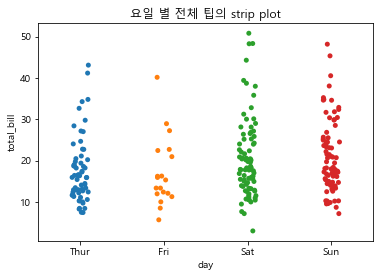

In [26]:
np.random.seed(0)
sns.stripplot(x='day', y='total_bill', data=tips, jitter=True)
plt.title('요일 별 전체 팁의 strip plot')
plt.show()

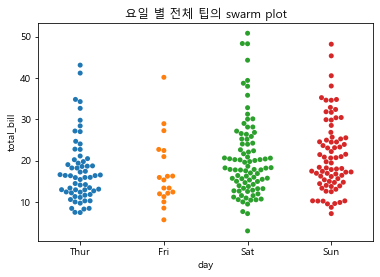

In [27]:
sns.swarmplot(x='day', y='total_bill', data=tips) # 데이터를 나타내는 점이 겹치지 않도록 옆으로 이동
plt.title('요일 별 전체 팁의 swarm plot')
plt.show()

### 다차원 복합 데이터

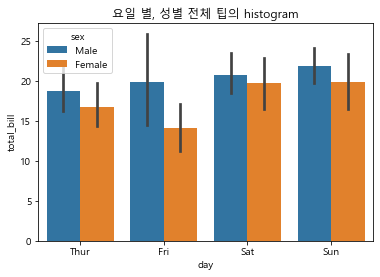

In [28]:
sns.barplot(x='day', y='total_bill', hue='sex', data=tips)
plt.title('요일 별, 성별 전체 팁의 histogram')
plt.show()

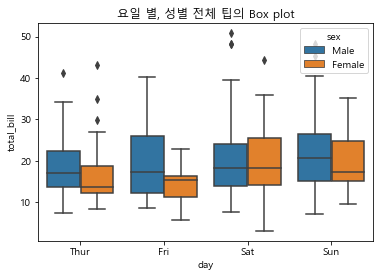

In [29]:
sns.boxplot(x='day', y='total_bill', hue='sex', data=tips)
plt.title('요일 별, 성별 전체 팁의 Box plot')
plt.show()

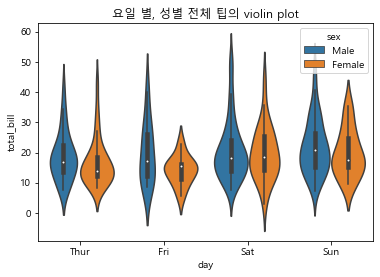

In [31]:
sns.violinplot(x='day', y='total_bill', hue='sex', data=tips)
plt.title('요일 별, 성별 전체 팁의 violin plot')
plt.show()

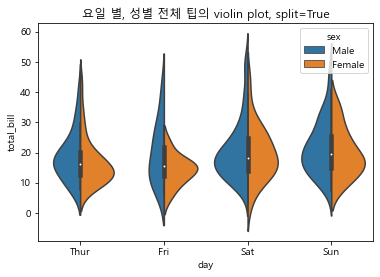

In [30]:
sns.violinplot(x='day', y='total_bill', hue='sex', data=tips, split=True)
plt.title('요일 별, 성별 전체 팁의 violin plot, split=True')
plt.show()

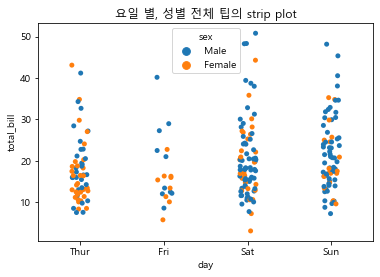

In [33]:
sns.stripplot(x='day', y='total_bill', hue='sex',
                 data=tips, jitter=True)
plt.title('요일 별, 성별 전체 팁의 strip plot')
plt.show()

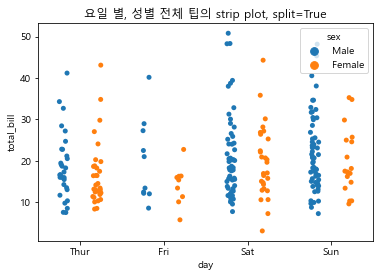

In [32]:
sns.stripplot(x='day', y='total_bill', hue='sex',
                 data=tips, jitter=True, dodge=True)
plt.title('요일 별, 성별 전체 팁의 strip plot, split=True')
plt.show()

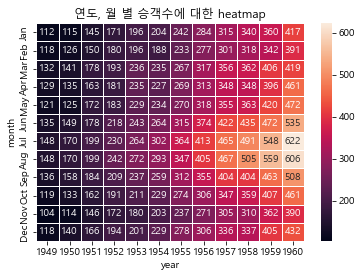

In [34]:
flights_passengers = flights.pivot('month', 'year', 'passengers')
plt.title('연도, 월 별 승객수에 대한 heatmap')
sns.heatmap(flights_passengers, annot=True, fmt='d', linewidths=1)
plt.show()

### catplot
- 색상(hue)과 행(row) 등을 동시에 사용하여 3개 이상의 카테고리 값에 의한 분포 변화를 보여준다.

C:\Users\82109\anaconda3\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\82109\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
C:\Users\82109\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


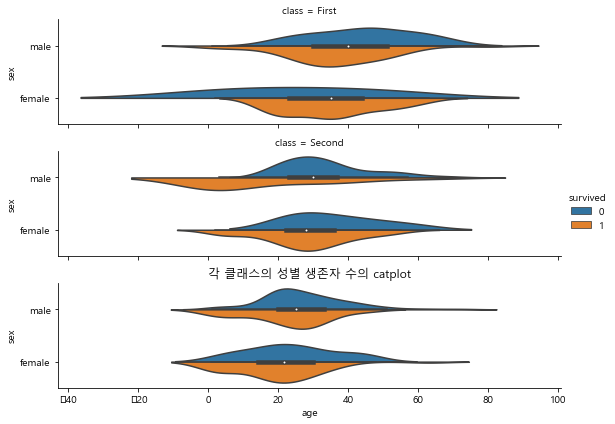

In [35]:
data = titanic[titanic.survived.notnull()]
sns.catplot(x='age', y='sex', hue='survived', row='class', data=data,
           kind='violin', split=True, height=2, aspect=4)
plt.title('각 클래스의 성별 생존자 수의 catplot')
plt.show()

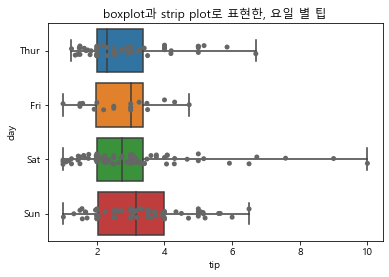

In [36]:
plt.title('boxplot과 strip plot로 표현한, 요일 별 팁')
sns.boxplot(x='tip', y='day', data=tips, whis=np.inf)
sns.stripplot(x='tip', y='day', data=tips, jitter=True, color='0.4')
plt.show()

In [41]:
def sinplot(flip=1):
    x = np.linspace(0,14,100)
    for i in range(1,7):
        plt.plot(x, np.sin(x+i*0.5)*(7-i)*flip)

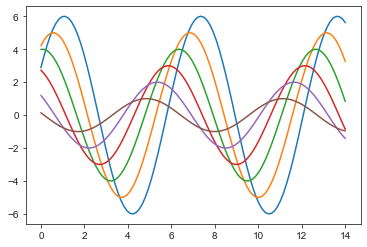

In [42]:
sns.set_style('ticks') # 틱 스타일만 바꿀 수 있음
sinplot()

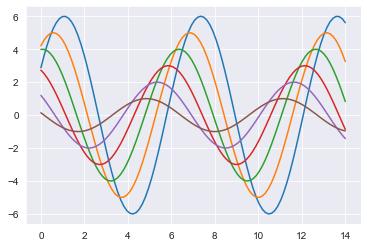

In [43]:
sns.set_style('darkgrid')
sinplot()

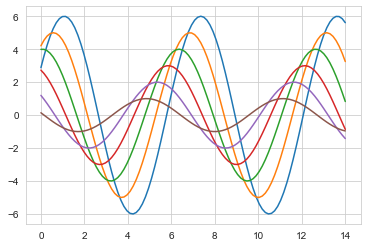

In [44]:
sns.set_style('whitegrid')
sinplot()